# SegNet-Shallow Training

In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import setup
from datasets import Frame_Data
from datasets import SUNRGBD
from models import SegNetShallow

/home/mike/.virtualenvs/py3.5_tfgpu/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
dataset = SUNRGBD()

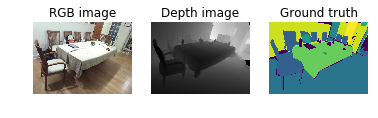

In [4]:
dataset.display_image(1,'train')

In [5]:
batch_size = 5

In [6]:
train_gen = dataset.data_generator('train', 'rgb', batch_size=batch_size)

In [7]:
test_gen = dataset.data_generator('test', 'rgb', batch_size=batch_size)

In [8]:
input_shape = (dataset.CROP_SIZE,dataset.CROP_SIZE,3)
model = SegNetShallow(input_shape, dataset.NUM_CLASSES)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 416, 416, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 416, 416, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 416, 416, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 208, 208, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 208, 208, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 208, 208, 128)     512    

In [15]:
model.train(train_gen,dataset.NUM_TRAIN_IMAGES,test_gen,dataset.NUM_TEST_IMAGES, weights_file='weights/SegNet.10-1.62-0.465.h5', batch_size=batch_size, epochs=4, lr=0.01)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/4
1057/1057 [==============================]1057/1057 [==============================] - 631s 597ms/step - loss: 1.6208 - acc: 0.4687 - val_loss: 1.7196 - val_acc: 0.4230

Epoch 2/4
1057/1057 [==============================]1057/1057 [==============================] - 633s 599ms/step - loss: 1.6097 - acc: 0.4722 - val_loss: 1.7025 - val_acc: 0.4413

Epoch 3/4
1057/1057 [==============================]1057/1057 [==============================] - 636s 602ms/step - loss: 1.6022 - acc: 0.4739 - val_loss: 1.7101 - val_acc: 0.4355

Epoch 4/4
1057/1057 [==============================]1057/1057 [==============================] - 640s 606ms/step - loss: 1.5853 - acc: 0.4789 - val_loss: 1.5980 - val_acc: 0.4722



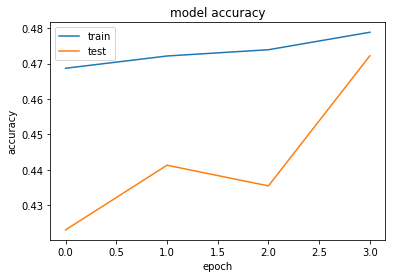

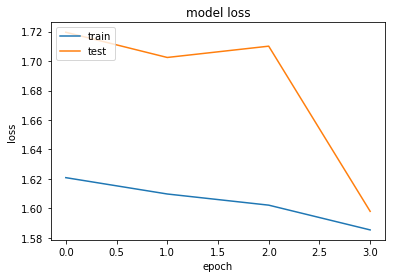

In [16]:
model.plot_results()

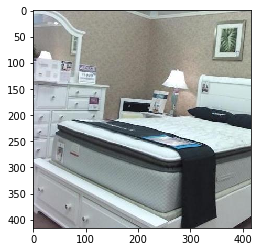

In [9]:
orig = cv2.imread('data/sunrgbd-data/sunrgbd_test_rgb/img-000014.jpg')
orig = dataset.preprocess_image(orig)
plt.imshow(orig)
plt.show()

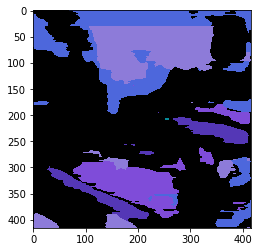

array([[12,  0,  0, ..., 12, 12, 12],
       [ 0,  0,  0, ..., 12, 12, 12],
       [ 0,  0,  0, ..., 12, 12, 12],
       ...,
       [ 5,  5,  5, ...,  0,  0,  0],
       [ 5,  5,  5, ...,  5,  0,  0],
       [ 0,  5,  5, ...,  5,  0,  0]])

In [10]:
model.predict(orig,'weights/SegNet.10-1.62-0.465.h5')

# Main Application - Background Transform

Welcome! Let's do some image background transformation!

Okay! First please first provide me an image you would like
 to change. Either provide me the full path to the image, or
 select a repository image ID from 1-5050.
14
Displaying your image...


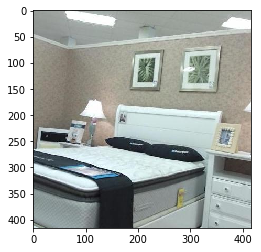

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 416, 416, 64)      1792      
_________________________________________________________________
batch_normalization_25 (Batc (None, 416, 416, 64)      256       
_________________________________________________________________
activation_28 (Activation)   (None, 416, 416, 64)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 208, 208, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 208, 208, 128)     73856     
_________________________________________________________________
batch_normalization_26 (Batc (None, 208, 208, 128)     512       
_________________________________________________________________
activation_29 (Activation)   (None, 208, 208, 128)     0         
__________

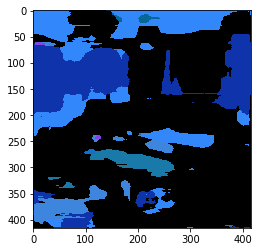

Trasforming your image...


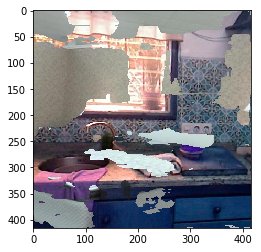

Are you satisfied with the result?[Y/n]y


In [14]:
%run -i 'main.py'